## Loading Libraries and Data

In [85]:
#Implementing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [86]:
data = pd.read_csv('Wine_2020.csv') #Reading the Excel File

In [87]:
data.head()

,fixed acidity,volatile acidity,critric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.567376,0.15,0.820326,1.6,0.174755,243.304154,100.354988,0.9948,3.456648,0.604694,13.297994,7
1,3.006749,0.28,1.602516,1.8,0.341262,218.125676,310.740380,0.9929,2.779328,1.049840,9.134693,5
2,7.354262,0.24,1.138284,7.7,0.303813,153.170821,166.964841,0.9938,2.945272,0.873361,10.592140,6
3,6.942369,0.22,1.090815,10.4,0.084264,116.195476,360.264333,0.9987,3.657075,0.565282,11.219277,6
4,6.235026,0.28,0.101780,8.7,0.096892,123.352272,209.157680,0.9961,2.971558,0.896674,10.438754,5


In [88]:
data.shape

(4000, 12)

In [89]:
y = data['quality'] # Target Variable as a seperate Variable
x = data.drop('quality',axis=1)

In [90]:
x.head()

,fixed acidity,volatile acidity,critric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.567376,0.15,0.820326,1.6,0.174755,243.304154,100.354988,0.9948,3.456648,0.604694,13.297994
1,3.006749,0.28,1.602516,1.8,0.341262,218.125676,310.740380,0.9929,2.779328,1.049840,9.134693
2,7.354262,0.24,1.138284,7.7,0.303813,153.170821,166.964841,0.9938,2.945272,0.873361,10.592140
3,6.942369,0.22,1.090815,10.4,0.084264,116.195476,360.264333,0.9987,3.657075,0.565282,11.219277
4,6.235026,0.28,0.101780,8.7,0.096892,123.352272,209.157680,0.9961,2.971558,0.896674,10.438754


In [91]:
y.head()

0    7
1    5
2    6
3    6
4    5
Name: quality, dtype: int64

### Splitting into Train and Test data

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) 

In [93]:
print("shape of original dataset :", data.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (4000, 12)
shape of input - training set (3200, 11)
shape of output - training set (3200,)
shape of input - testing set (800, 11)
shape of output - testing set (800,)


### Scaling the data by dividing with Maximum number

In [94]:
# Dividing the Original Data by the max value of each column
transformer = MaxAbsScaler()
X_train = transformer.fit_transform(x_train)
X_test = transformer.fit_transform(x_test)

Y_train = transformer.fit_transform(y_train.values.reshape(-1,1))
Y_test = transformer.fit_transform(y_test.values.reshape(-1,1))

In [95]:
X_train

array([[0.71749491, 0.39800995, 0.83286963, ..., 0.87041113, 0.66165872,
        0.86433318],
       [0.53420099, 0.23880597, 0.22216536, ..., 0.72373601, 0.95264716,
        0.87633865],
       [0.4206763 , 0.35820896, 0.27090313, ..., 0.90000244, 0.4242505 ,
        0.73424603],
       ...,
       [0.84268783, 0.27860697, 0.95644651, ..., 0.83069939, 0.7729834 ,
        0.66292583],
       [0.21355937, 0.3681592 , 0.56675126, ..., 0.88882261, 0.7578319 ,
        0.68116558],
       [0.47193593, 0.39800995, 0.721628  , ..., 0.98940026, 0.78400157,
        0.64206564]])

In [96]:
#Defining the Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(y):
    return sigmoid(y)*(1-sigmoid(y))

## Defining the model architecture

In [149]:
# Defining the Neural Network Function and its attributes
def NN(X_train, Y_train, hiddenLayer_neurons, lr, epochs):
    inputLayer_neurons = X_train.shape[1]  # number of features in data set
    hiddenLayer_neurons = 10  # number of hidden layers neurons
    outputLayer_neurons = 1  # number of neurons at output layer
    np.random.seed(0) # to get the same values when they are implemented each time

    # initializing weight
    W1 = np.random.randn(inputLayer_neurons, hiddenLayer_neurons)
    W2 = np.random.randn(hiddenLayer_neurons, outputLayer_neurons)

    # defining the parameters
#     lr = 0.0001
#     epochs = 10000


    losses = []
    for epoch in range(epochs):
        ## Forward Propogation

        # calculating hidden layer activations
        hiddenLayer_linearTransform = np.dot(X_train, W1)
        hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

        # calculating the output
        outputLayer_linearTransform = np.dot(hiddenLayer_activations, W2)
        output = sigmoid(outputLayer_linearTransform)

        ## Backward Propagation

        # calculating error
        loss = np.square(Y_train - output) / 2
    #     ================================== Phase 1 errors ==================================

        # calculating rate of change of error w.r.t weight between hidden and output layer
        derror_douto = -(Y_train - output)

        douto_dino = sigmoid_derivative(output)
        dino_dwo = hiddenLayer_activations
        derror_dwo = np.dot(dino_dwo.T, derror_douto * douto_dino)

    #     ================================== Phase 2 errors ==================================

        # calculating rate of change of error w.r.t weights between input and hidden layer
        derror_dino = derror_douto * douto_dino
        dino_douth = W2
        derror_douth = np.dot(derror_dino, dino_douth.T)
        douth_dinh = sigmoid_derivative(hiddenLayer_linearTransform)
        dinh_dwh = X_train
        derror_wh = np.dot(dinh_dwh.T, douth_dinh * derror_douth)

        # updating the weights
        W2 = W2 - lr * derror_dwo
        W1 = W1 - lr * derror_wh

        # print error at every 1000th epoch
        epoch_loss = np.average(loss)
        if epoch % 1000 == 0:
            print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

        # appending the error of each epoch
        losses.append(epoch_loss)

    return W1, W2, losses

### When Neurons are 10 and lr = 0.0001

In [150]:
W1, W2, losses = NN(X_train, Y_train, hiddenLayer_neurons = 10, lr = 0.0001, epochs = 10000)

Error at epoch 0 is 0.02632
Error at epoch 1000 is 0.00492
Error at epoch 2000 is 0.00403
Error at epoch 3000 is 0.00355
Error at epoch 4000 is 0.00321
Error at epoch 5000 is 0.00295
Error at epoch 6000 is 0.00276
Error at epoch 7000 is 0.00260
Error at epoch 8000 is 0.00246
Error at epoch 9000 is 0.00235


In [99]:
def run(inputs, W1, W2):
    # Run a forward pass through the network
    #### Implement the forward pass here ####
    #  Hidden layer
    hidden_inputs = np.dot(inputs, W1)# signals into hidden layer
    hidden_outputs = sigmoid(hidden_inputs) # signals from hidden layer

    # TODO: Output layer
    final_inputs = np.dot(hidden_outputs, W2) # signals into final output layer
    final_outputs = final_inputs # signals from final output layer

    return final_outputs

In [100]:
predictions = run(X_test, W1, W2)

In [101]:
epochs = 10000

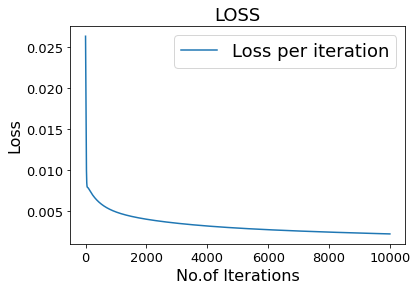

In [103]:
plt.plot(np.arange(1, epochs + 1), np.array(losses),label='Loss per iteration')
plt.title('LOSS', size=18)
plt.legend(loc='upper right', fontsize=18)
plt.xlabel('No.of Iterations', size=16) 
plt.ylabel('Loss', size=16)
plt.tick_params(labelsize=13)
plt.savefig('LOSS', 
            bbox_inches='tight', dpi=300, pad_inches=0.0)

In [104]:
def run(inputs, W1, W2):
    """
    This is a function for predictions of test data
    """
    # Run a forward pass through the network
    #### Implement the forward pass here ####
    #  Hidden layer
    hidden_inputs = np.dot(inputs, W1)# signals into hidden layer
    hidden_outputs = sigmoid(hidden_inputs) # signals from hidden layer

    # TODO: Output layer
    final_inputs = np.dot(hidden_outputs, W2) # signals into final output layer
    final_outputs = final_inputs # signals from final output layer

    return final_outputs

In [105]:
predictions = run(X_test, W1, W2)

In [106]:
df = pd.DataFrame(W1)

In [107]:
file = "W1.xlsx"

In [108]:
df.to_excel(file, index = False)

In [109]:
W2

array([[ 0.67049014],
       [ 1.28708979],
       [-2.25824545],
       [ 1.08843367],
       [-0.6625624 ],
       [ 0.43439312],
       [ 1.07577746],
       [-0.31727156],
       [ 0.17120575],
       [ 0.94542949]])

In [110]:
df_1 = pd.DataFrame(W2)

In [111]:
file_1 = "W2.xlsx"

In [112]:
df_1.to_excel(file_1, index = False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


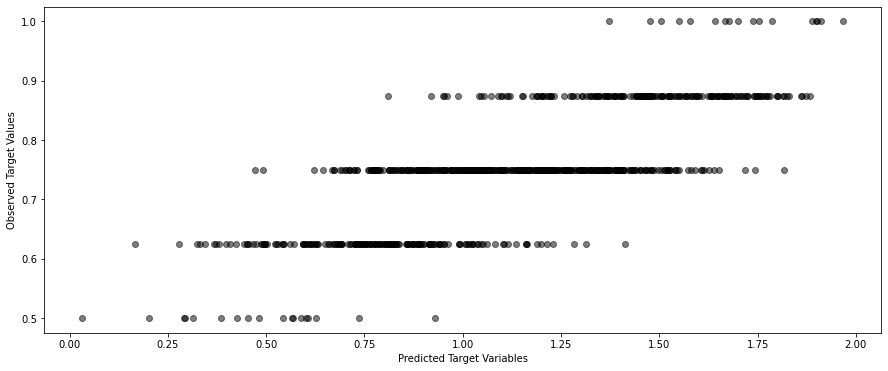

In [115]:
plt.figure(figsize=(15,6))
colours = (0,0,0)
plt.scatter(predictions, Y_test, s= None,c=colours, alpha=0.5)
plt.xlabel('Predicted Target Variables')
plt.ylabel('Observed Target Values')
plt.savefig('Predicted Target vs Observed Target', 
            bbox_inches='tight', dpi=300, pad_inches=0.0)
plt.show()

## When Neurons are 9 and lr = 0.0001

In [139]:
W1_9, W2_9, losses_9 = NN(X_train, Y_train, hiddenLayer_neurons = 9, lr = 0.0001, epochs = 10000)

Error at epoch 0 is 0.00846
Error at epoch 1000 is 0.00206
Error at epoch 2000 is 0.00163
Error at epoch 3000 is 0.00150
Error at epoch 4000 is 0.00145
Error at epoch 5000 is 0.00142
Error at epoch 6000 is 0.00141
Error at epoch 7000 is 0.00140
Error at epoch 8000 is 0.00139
Error at epoch 9000 is 0.00138


In [117]:
epochs = 10000

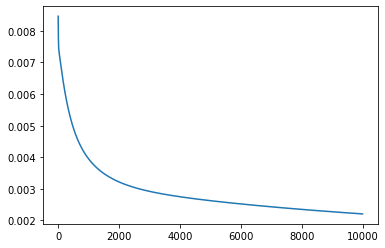

In [118]:
plt.plot(np.arange(1, epochs + 1), np.array(losses_9))

In [119]:
predictions_9 = run(X_test, W1_9, W2_9)

In [120]:
y = (predictions_9)
x =(Y_test)

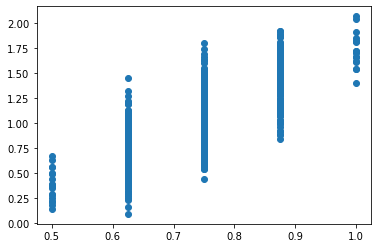

In [121]:
plt.scatter(x,y)

### When Neurons are 9 and lr = 0.001

In [122]:
W1_9_lr, W2_9_lr, losses_9_lr = NN(X_train, Y_train, hiddenLayer_neurons = 9, lr = 0.001, epochs = 10000)

Error at epoch 0 is 0.00846
Error at epoch 1000 is 0.00221
Error at epoch 2000 is 0.00178
Error at epoch 3000 is 0.00162
Error at epoch 4000 is 0.00156
Error at epoch 5000 is 0.00153
Error at epoch 6000 is 0.00152
Error at epoch 7000 is 0.00151
Error at epoch 8000 is 0.00150
Error at epoch 9000 is 0.00149


In [123]:
epochs = 10000

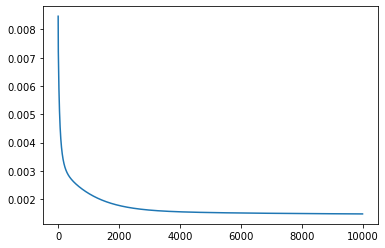

In [124]:
plt.plot(np.arange(1, epochs + 1), np.array(losses_9_lr))

In [125]:
predictions_9_lr = run(X_test, W1_9_lr, W2_9_lr)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


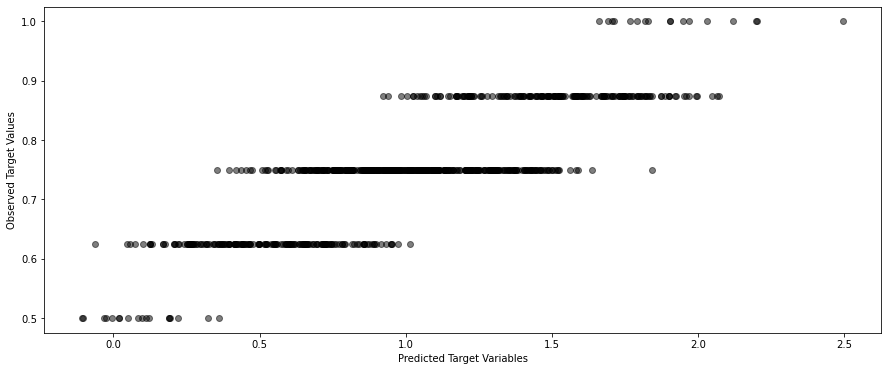

In [126]:
plt.figure(figsize=(15,6))
colours = (0,0,0)
plt.scatter(predictions_9_lr, Y_test, s= None,c=colours, alpha=0.5)
plt.xlabel('Predicted Target Variables')
plt.ylabel('Observed Target Values')
plt.savefig('Predicted Target vs Observed Target', 
            bbox_inches='tight', dpi=300, pad_inches=0.0)
plt.show()

## When Neurons are 9 and lr = 0.01

In [142]:
W1_9_1, W2_9_1, losses_9_1 = NN(X_train, Y_train, hiddenLayer_neurons = 9, lr = 0.01, epochs = 10000)

Error at epoch 0 is 0.00846
Error at epoch 1000 is 0.00206
Error at epoch 2000 is 0.00163
Error at epoch 3000 is 0.00150
Error at epoch 4000 is 0.00145
Error at epoch 5000 is 0.00142
Error at epoch 6000 is 0.00141
Error at epoch 7000 is 0.00140
Error at epoch 8000 is 0.00139
Error at epoch 9000 is 0.00138


## When Neurons are 9 and lr = 0.01

In [143]:
W1_9_2, W2_9_2, losses_9_2 = NN(X_train, Y_train, hiddenLayer_neurons = 9, lr = 0.1, epochs = 10000)

Error at epoch 0 is 0.00846
Error at epoch 1000 is 0.03653
Error at epoch 2000 is 0.03653
Error at epoch 3000 is 0.03653
Error at epoch 4000 is 0.03653
Error at epoch 5000 is 0.03653
Error at epoch 6000 is 0.03653
Error at epoch 7000 is 0.03653
Error at epoch 8000 is 0.03653
Error at epoch 9000 is 0.03653


## When Neurons are 8 and lr = 0.0001

In [127]:
W1_8, W2_8, losses_8 = NN(X_train, Y_train, hiddenLayer_neurons = 8, lr = 0.0001, epochs = 10000)

Error at epoch 0 is 0.00736
Error at epoch 1000 is 0.00479
Error at epoch 2000 is 0.00425
Error at epoch 3000 is 0.00397
Error at epoch 4000 is 0.00379
Error at epoch 5000 is 0.00366
Error at epoch 6000 is 0.00356
Error at epoch 7000 is 0.00347
Error at epoch 8000 is 0.00338
Error at epoch 9000 is 0.00330


In [128]:
epochs = 10000

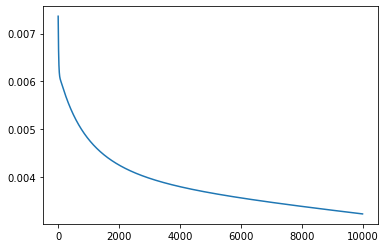

In [129]:
plt.plot(np.arange(1, epochs + 1), np.array(losses_8))

In [130]:
predictions_8 = run(X_test, W1_8, W2_8)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


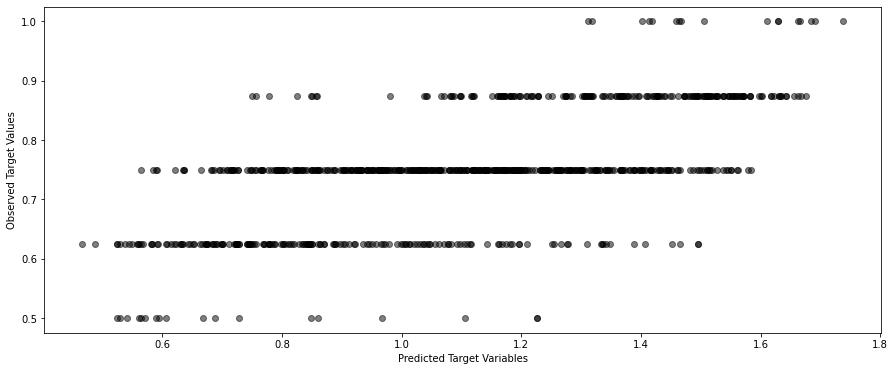

In [131]:
plt.figure(figsize=(15,6))
colours = (0,0,0)
plt.scatter(predictions_8, Y_test, s= None,c=colours, alpha=0.5)
plt.xlabel('Predicted Target Variables')
plt.ylabel('Observed Target Values')
plt.savefig('Predicted Target vs Observed Target', 
            bbox_inches='tight', dpi=300, pad_inches=0.0)
plt.show()

### When Neurons are 8 and lr = 0.001

Error at epoch 0 is 0.00736
Error at epoch 1000 is 0.00322
Error at epoch 2000 is 0.00247
Error at epoch 3000 is 0.00187
Error at epoch 4000 is 0.00162
Error at epoch 5000 is 0.00154
Error at epoch 6000 is 0.00151
Error at epoch 7000 is 0.00150
Error at epoch 8000 is 0.00149
Error at epoch 9000 is 0.00149


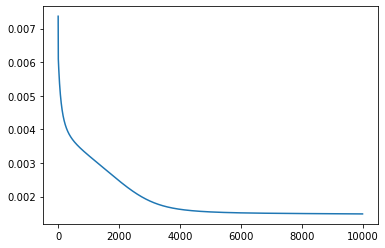

In [132]:
W1_8_lr, W2_8_lr, losses_8_lr = NN(X_train, Y_train, hiddenLayer_neurons = 8, lr = 0.001, epochs = 10000)
plt.plot(np.arange(1, epochs + 1), np.array(losses_8_lr))

In [133]:
epochs = 10000

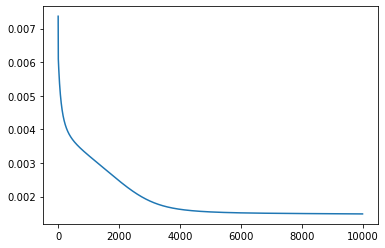

In [134]:
plt.plot(np.arange(1, epochs + 1), np.array(losses_8_lr))

In [136]:
predictions_8_lr = run(X_test, W1_8_lr, W2_8_lr)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


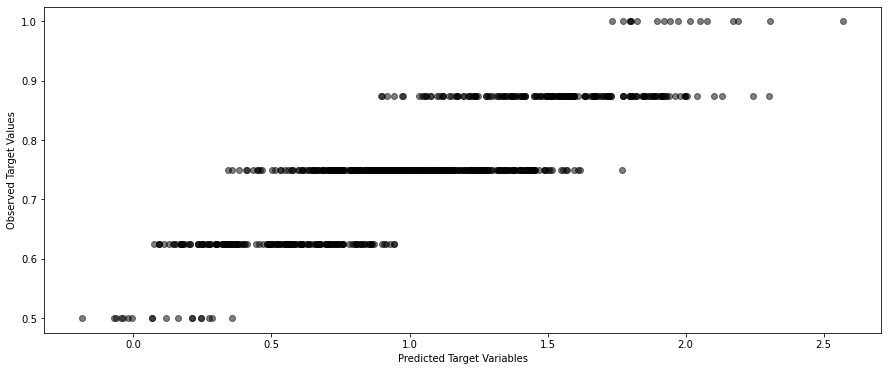

In [138]:
plt.figure(figsize=(15,6))
colours = (0,0,0)
plt.scatter(predictions_8_lr, Y_test, s= None,c=colours, alpha=0.5)
plt.xlabel('Predicted Target Variables')
plt.ylabel('Observed Target Values')
plt.savefig('Predicted Target vs Observed Target', 
            bbox_inches='tight', dpi=300, pad_inches=0.0)
plt.show()

### When Neurons are 8 and lr = 0.01

In [144]:
W1_8_1, W2_8_1, losses_8_1 = NN(X_train, Y_train, hiddenLayer_neurons = 8, lr = 0.01, epochs = 10000)

Error at epoch 0 is 0.00736
Error at epoch 1000 is 0.00185
Error at epoch 2000 is 0.00154
Error at epoch 3000 is 0.00145
Error at epoch 4000 is 0.00142
Error at epoch 5000 is 0.00141
Error at epoch 6000 is 0.00140
Error at epoch 7000 is 0.00140
Error at epoch 8000 is 0.00140
Error at epoch 9000 is 0.00139


### When Neurons are 8 and lr = 0.1

In [145]:
W1_8_2, W2_8_2, losses_8_2 = NN(X_train, Y_train, hiddenLayer_neurons = 8, lr = 0.1, epochs = 10000)

Error at epoch 0 is 0.00736
Error at epoch 1000 is 0.03653
Error at epoch 2000 is 0.03653
Error at epoch 3000 is 0.03653
Error at epoch 4000 is 0.03653
Error at epoch 5000 is 0.03653
Error at epoch 6000 is 0.03653
Error at epoch 7000 is 0.03653
Error at epoch 8000 is 0.03653
Error at epoch 9000 is 0.03653
